# Titanic Data Analysis
**Author:** Derek Fintel

**Date:** March, 20th, 2025 

**Objective:** Predict the median house price in California using available housing features.


## Introduction
In this project we utilize a trusted Titanic dataset to conduct various analyses, exercise functions, and provide meaningful predicitions of target data. 

This project is organized into the following Sections:
- Section 0: Imports
- Section 1: Load and Inspect the Data
- Section 2: Data Exploration and Preparation
- Section 3: Feature Selection and Justification
- Section 4: Splitting

## Imports  
Below are our modules used.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


## Section 1. Load and Inspect the Data

### 1.1 Load the dataset and display its info
- We load the Titanic dataset directly from `seaborn`.
- We display summary information of the dataset using the info() method.

In [3]:
# Replace 'your_file.csv' with the actual name of your CSV file
df = pd.read_csv('data/titanic_train.csv')
df.columns = df.columns.str.strip().str.lower()
#df.columns = df.columns.str.lower()
print(df.columns)

# Print the first 5 rows of the dataframe
print(df.head())
#We retrieve its summary info via '.info()'
df.info()

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
   passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

### 1.2 Display the first 10 rows.  

In [4]:
# Here we 'print' the first 10 rows via '.head(10)'
print(df.head(10))

   passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

### 1.3 Check for missing values using the 'isnull()' method and then the 'sum()' method.

In [5]:
# Here we use '.isnull()' to retrieve missing values
# We follow by retrieving summary count via 'sum()'
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

### 1.4 Display summary statistics using the 'describe()' method

In [6]:
# We use '.describe()' to perform summary statistic analysis
print(df.describe())

       passengerid    survived      pclass         age       sibsp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            parch        fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### 1.5 Check for correlations using the 'corr()' method and tell it to use only the numeric features. 

In [7]:
# Here '.corr(numeric_only=True)' retrieves numerical correlations
print(df.corr(numeric_only=True))

             passengerid  survived    pclass       age     sibsp     parch  \
passengerid     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
sibsp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 fare  
passengerid  0.012658  
survived     0.257307  
pclass      -0.549500  
age          0.096067  
sibsp        0.159651  
parch        0.216225  
fare         1.000000  


### Reflection of Section 1:
1) How many data instances are there?
   1) Ans: 891
2) How many features are there?
   1) Ans: 15
3) What are the names?
   1) Ans: Columns            
    0   survived        
    1   pclass          
    2   sex            
    3   age           
    4   sibsp           
    5   parch           
    6   fare          
    7   embarked       
    8   class        
    9   who            
    10  adult_male      
    11  deck         
    12  embark_town    
    13  alive        
    14  alone
4) Are there any missing values?
   1) Ans: No
5) Are there any non-numeric features?
   1) Ans: Yes
6) Are the data instances sorted on any of the attributes?
   1) Ans: Yes
7) What are the units of age?
   1) Ans: float64
8) What are the minimum, median and max age?
   1) Ans: Minimum = 0.42, Median = 29.69, & Max = 80.00
9)  What two different features have the highest correlation?
    1) Ans: 'adult_male' & 'alone'.  
10) Are there any categorical features that might be useful for prediction?
    1) Ans: 'pclass', 'age'. 

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions
Create a scatter matrix. 

Since Titanic contains both numeric and categorical variables, we'll use only numeric values here.

Important:  Use only numeric attributes for the scatter matrix. If you want to explore categorical data, use count plots and bar plots instead.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

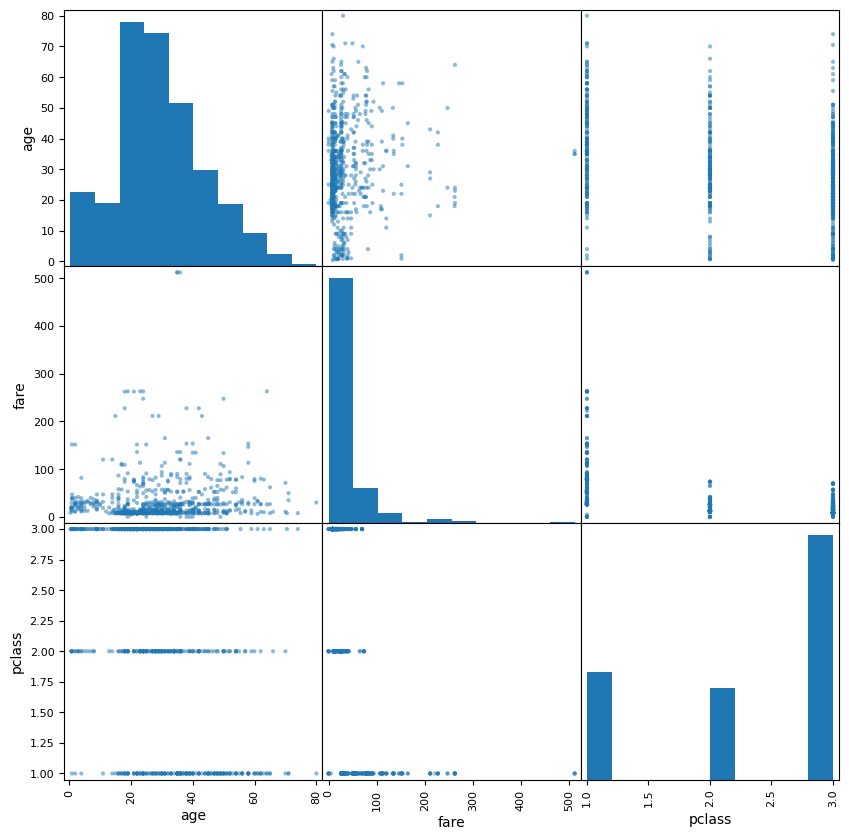

In [8]:
# We assign our attributes to the scatter_matrix and figure sizes.
attributes = ['age', 'fare', 'pclass']
scatter_matrix(df[attributes], figsize=(10, 10))


### 2.2 Scatterplots

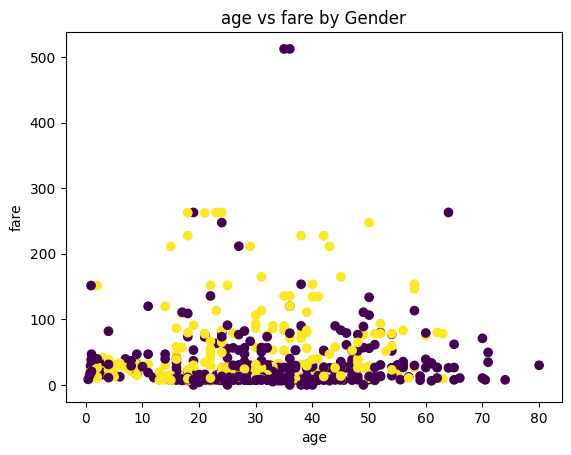

In [9]:
# We use our attributes to create scatterplots.
plt.scatter(df['age'], df['fare'], c=df['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('age')
plt.ylabel('fare')
plt.title('age vs fare by Gender')
plt.show()

### 2.3 Histogram

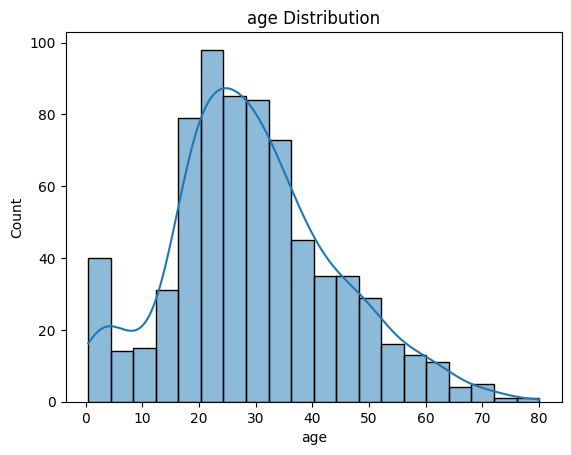

In [10]:
#We create a histogram of age.
sns.histplot(df['age'], kde=True)
plt.title('age Distribution')
plt.show()

### 2.4 Count Plot

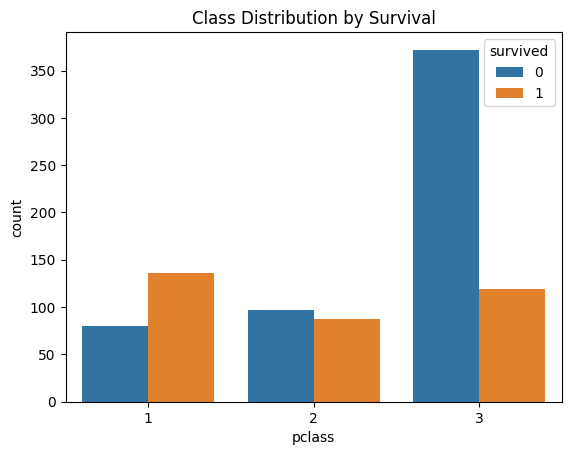

In [11]:
#We create a count plot for class and survival.
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Class Distribution by Survival')
plt.show()

### Reflection of Section 2.1:
1) What patterns or anomalies do you notice?
   1) Ans: Right-side tail of 'pclass' to 'age'
2) Do any features stand out as potential predictors?
   1) Ans: 'fare', 'age'.
3) Are there any visible class imbalances?
   1) Ans: 'fare' to 'pclass'.

### 2.2 Handle Missing Values and Clean Data

In [12]:
# age was missing values. 
# We can impute missing values for age using the median:
df.loc[:, 'age'] = df['age'].fillna(df['age'].median())
 
# embarked was missing values.
# We can drop missing values for embarked (or fill with mode):
df.loc[:, 'embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

### 2.3 Feature Engineering
Steps a/b/c:

2.3a: Create a new feature: Family size

In [13]:
# We create a new feature: Family size
df['family_size'] = df['sibsp'] + df['parch'] + 1

2.3b: Convert categorical data to numeric:

In [14]:
# We convert categorical data to numeric.
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

2.3c: Create a binary feature for 'alone':

In [15]:
# We create a binary feature for 'Alone'.
# Create 'Alone' column: 1 if no siblings/spouse or parents/children aboard, else 0
df['Alone'] = ((df['sibsp'] + df['parch']) == 0).astype(int)
#df['Alone'] = df['Alone'].astype(int)

### Reflection of Section 2.3

1) Why might family size be a useful feature for predicting survival?
   1) Ans: Due to the separation of 'adult_male'.
2) Why convert categorical data to numeric?
   1) Ans: To better train the model (easier).

## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target
Choose features and target

1) Select two or more input features (numerical for regression, numerical and/or categorical for classification)

2) Select a target variable (as applicable)
Classification: Categorical target variable (e.g., gender, species).
Justify your selection with reasoning.
 
For classification, we’ll use 'survived' as the target variable.

3) Input features: age, fare, pclass, sex, family_size

4) Target: 'survived'


### 3.2 Define X and y
1) Assign input features to X
2) Assign target variable to y (as applicable)

In [16]:
# Here we assign inputs to "x" and 
# target variables to "y".
X = df[['age', 'fare', 'pclass', 'sex']]
y = df['survived']

### Reflection of Section 3:

1) Why are these features selected?
   1) Ans: Because they all have correlations to our target of 'survived'.
2) Are there any features that are likely to be highly predictive of survival?
   1) Ans: 'pclass', 'sex', 'age'.

## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. Compare.

### 4.1 Basic Train/Test split 

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Here we split the data for training and testing
# 'X_train' and 'X_test'.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('Train size:', len(X_train))
print('Test size:', len(X_test))


Train size: 712
Test size: 179


### 4.2 Stratified Train/Test split

In [18]:
# Here we assign indices to stratify our test & train data.
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### Compare Results

In [19]:
# Here we print our findings to compare results.
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("")
# Basic Train/Test:
print("Basic Train/Test Method")
print("Train Set Class Distribution:\n", X_train['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", X_test['pclass'].value_counts(normalize=True))
print("")
# Stratified Train/Test
print("Stratified Train/Test Method")
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic Train/Test Method
Train Set Class Distribution:
 pclass
3    0.557584
1    0.233146
2    0.209270
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.525140
1    0.279330
2    0.195531
Name: proportion, dtype: float64

Stratified Train/Test Method
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


### Reflection of Section 4:

1) Why might stratification improve model performance?
   1) Ans: It would increase the trust within the trained data. 
2) How close are the training and test distributions to the original dataset?
   1) Ans: Close, but not a tight accuracy. 
3) Which split method produced better class balance?
   1) Ans: Stratification


Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       439
           1       1.00      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       110
           1       0.63      0.64      0.63        69

    accuracy                           0.72       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.72      0.72      0.72       179



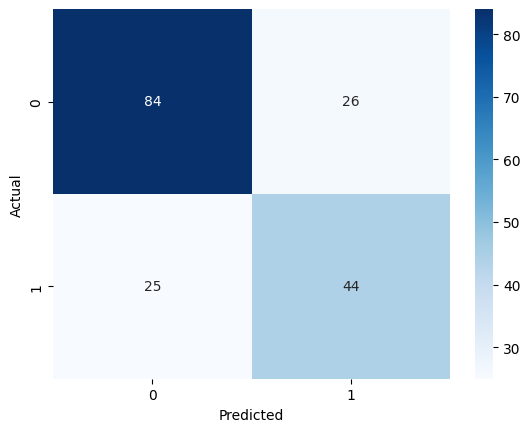

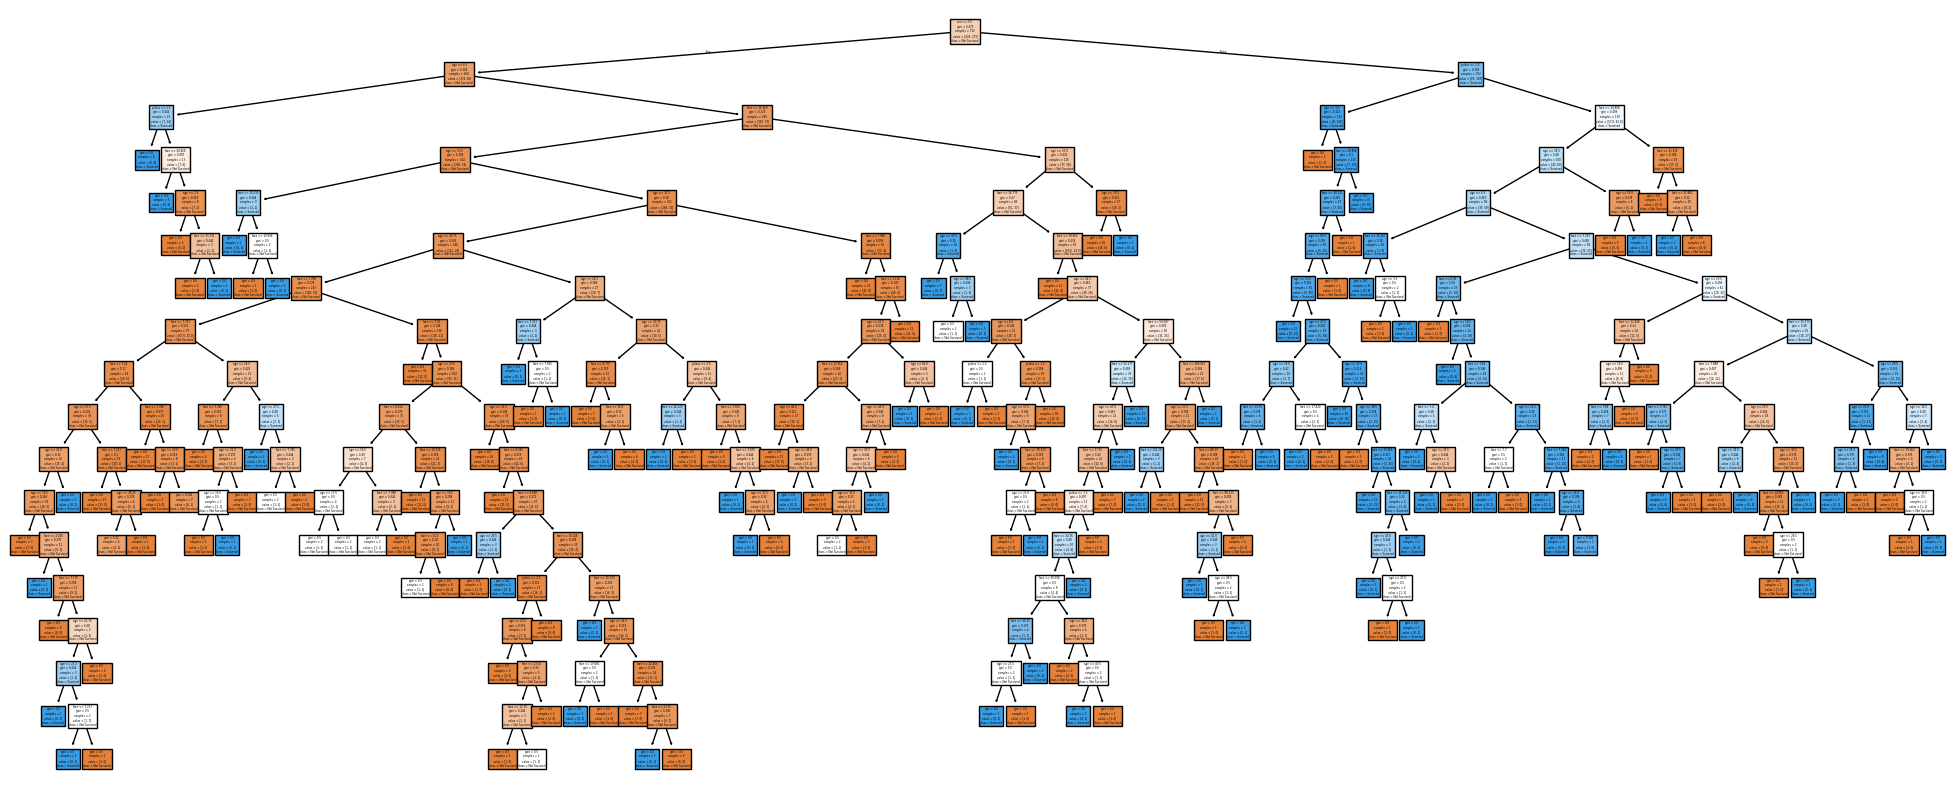

In [20]:
# Case 2: age only
#x = titanic[['age']]
#y = titanic['survived']

# Split the data into training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate the model on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

# Evaluate the model on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

In [21]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier()
}


### Section 5. Compare Alternative Models
In this section, we will take the best-performing case and explore other regression models.

Choose Best Case to Continue
Choose the best case model from the four cases. Use that model to continue to explore additional continuous prediction models. The following assumes that Case 1 was the best predictor  - this may not be the case. Adjust the code to use your best case model instead. 

Choosing Options
When working with regression models, especially those with multiple input features, we may run into overfitting — where a model fits the training data too closely and performs poorly on new data. To prevent this, we can apply regularization.

Regularization adds a penalty to the model’s loss function, discouraging it from using very large weights (coefficients). This makes the model simpler and more likely to generalize well to new data.

In general: 
- If the basic linear regression is overfitting, try Ridge.
- If you want the model to automatically select the most important features, try Lasso.
- If you want a balanced approach, try Elastic Net.

--- Decision Tree ---
[[84 26]
 [22 47]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       110
           1       0.64      0.68      0.66        69

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.74      0.73      0.73       179

--- SVM ---
[[96 14]
 [41 28]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       110
           1       0.67      0.41      0.50        69

    accuracy                           0.69       179
   macro avg       0.68      0.64      0.64       179
weighted avg       0.69      0.69      0.67       179

--- MLP ---
[[93 17]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79  

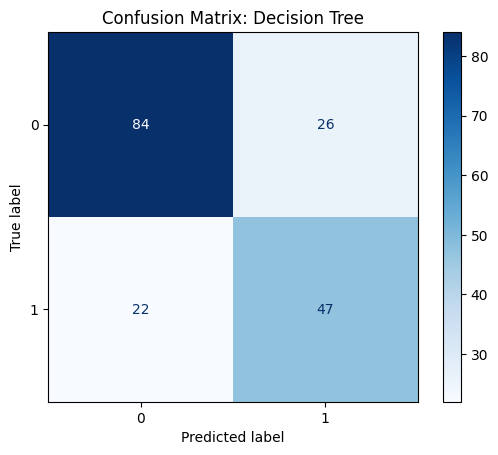

In [22]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(models['Decision Tree'], X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

### 5.4 Compare All Models
Create a summary table or printout comparing all models:

Decision Tree: Mean accuracy = 0.78
SVM: Mean accuracy = 0.67
MLP: Mean accuracy = 0.78
Random Forest: Mean accuracy = 0.81
KNN: Mean accuracy = 0.70


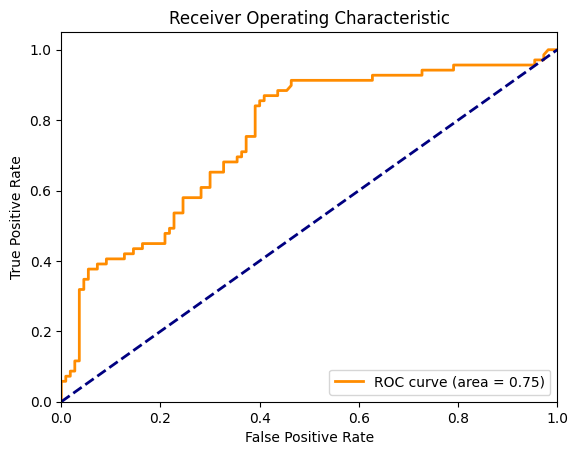

In [23]:

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean accuracy = {scores.mean():.2f}")

# Example for ROC curve with SVM
y_pred_prob = models['SVM'].predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Section 6. Final Thoughts & Insights
Your notebook should tell a data story. Use this section to demonstrate your thinking and value as an analyst.

### 6.1 Summarize Findings
1) What features were most useful? 
   1) Ans: Sex and Age were helpful base parameters.
2) What regression model performed best? 
   1) Ans: Poly appeared to smoothen everything out. 
3) How did model complexity or regularization affect results?
   1) Ans: Increasing the polynomial degree helped sharpen the plotting/insights. 

### 6.2 Discuss Challenges
1) Was fare hard to predict? Why?
   1) Ans: It was as the selected inputs did not reveal strong correlations to 'fare'.
2) Did skew or outliers impact the models?
   1) Ans: Yes, and particularly around how 'fare' data may have been affected/influenced.  

### 6.3 Optional Next Steps
1) Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)
2) Try predicting age instead of fare
3) Explore log transformation of fare to reduce skew